# Using machine learning to predict strokes

## Data Preparation

### Required Specific Libraries

In [1]:
# for the linear algebra
import numpy as npy

# for the data processing
import pandas as pds

# Visualizations
import matplotlib.pyplot as matplt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score

# Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


### Import our dataset

In [2]:
#Import the dataset
dataframe = pds.read_csv('storke_data_for_healthy.csv')

In [3]:
#View the first five rows from the data frame
dataframe.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
#View the last five rows from the data frame
dataframe.tail()

id  gender   age  hypertension  heart_disease ever_married  \
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

In [5]:
#Get the data set tuple and features
print('No of tuples: ', dataframe.shape[0],'| No of features: ',dataframe.shape[1])

No of tuples:  5110 | No of features:  12


In [6]:
#Viewng values Mean, Median, Minimum , Maximum
dataframe.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [7]:
dataframe.describe(include=["O"])

gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

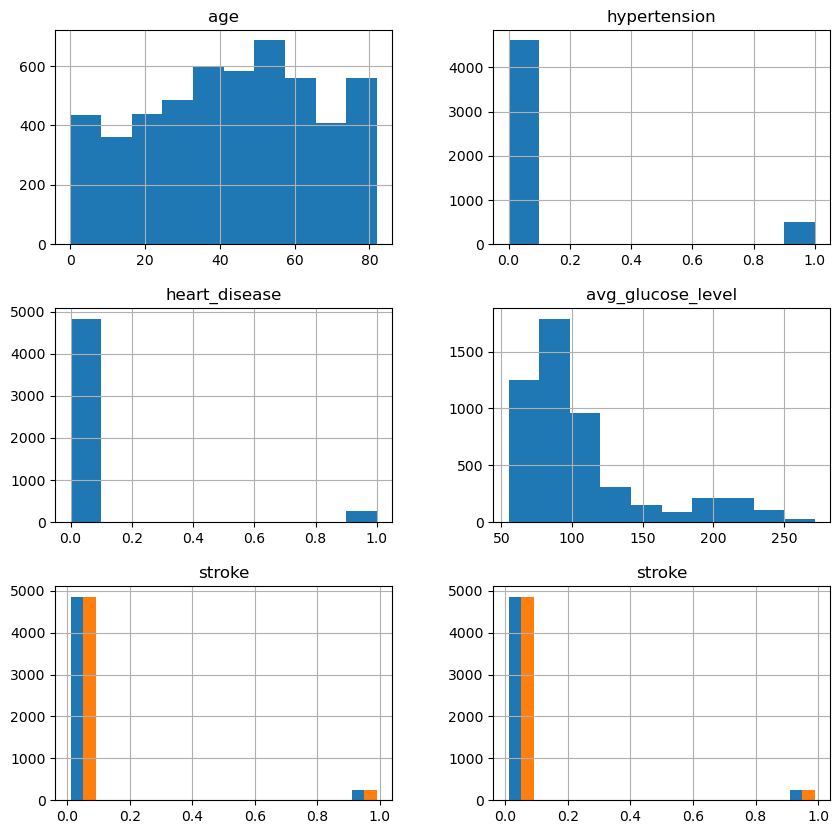

In [8]:
#Visualizing the numerical features of the dataset using histograms to analyze the distribution of those features in the dataset

rcParams['figure.figsize'] = 10, 10
dataframe[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'stroke', 'stroke']].hist()

In [9]:
#Replacing ? in dataset to the null values
dataframe.replace('',npy.nan )

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [10]:
#view correlation data set
dataframe.corr()

id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.003084  0.006388  
age                         0.238171  0.333398  0.245257  
hypertension                0.174474  0.167811  0.127904  
heart_disease               0.161857  0.041357  0.134914  
avg_glucose_level           1.000000  0.175502  0.131945  
bmi                         0.175502  1.000000  0.042374  
stroke                      0.131945  0.042374  1.000000

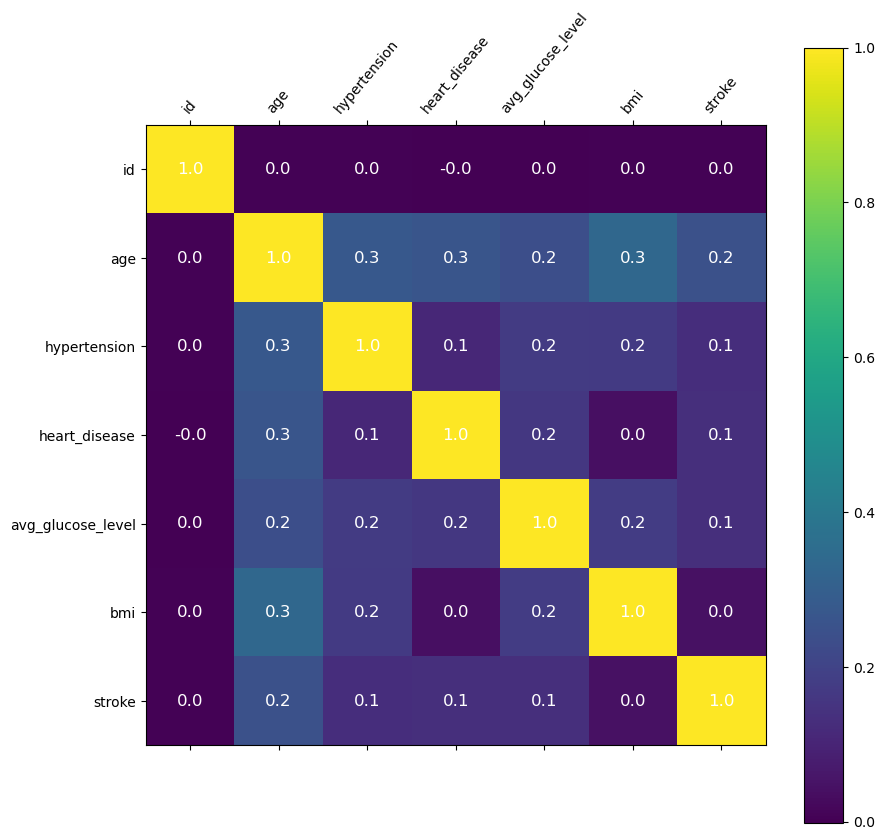

In [11]:
#Ploting the correlation between the output(stroke) and individual features
matplt.matshow(dataframe.corr())
matplt.colorbar()
matplt.xticks(npy.arange(len(dataframe.corr().columns)), dataframe.corr().columns.values, rotation = 50) 
matplt.yticks(npy.arange(len(dataframe.corr().columns)), dataframe.corr().columns.values) 
for (i, j), corr in npy.ndenumerate(dataframe.corr()):
    matplt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=12)

## Preprocess the data

In [12]:
#So it has 0 correlation, id column is unneccesary.so it can be dropped
dataframe.drop(["id"],axis=1,inplace=True)

In [13]:
#Get the shape of the dataset
dataframe.shape

(5110, 11)

In [14]:
#Found what is the presentage of data is missing from the dataframe

total_missing_value = dataframe.isnull().sum().sort_values(ascending=False)
present_1 = dataframe.isnull().sum()/dataframe.isnull().count()*100
present_2 = (round(present_1, 1)).sort_values(ascending=False)
missing_value = pds.concat([total_missing_value, present_2], axis=1, keys=['Total Missing Value', '%'])
missing_value.head(15)

Total Missing Value    %
bmi                                201  3.9
gender                               0  0.0
age                                  0  0.0
hypertension                         0  0.0
heart_disease                        0  0.0
ever_married                         0  0.0
work_type                            0  0.0
Residence_type                       0  0.0
avg_glucose_level                    0  0.0
smoking_status                       0  0.0
stroke                               0  0.0

In [15]:
#Since a very small amount of data is missing, we can replace the null values with the mean of bmi features
dataframe['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [16]:
#Applying Only on variables with NaN values
for col_mean in dataframe.columns[dataframe.isnull().any(axis=0)]:
    dataframe[col_mean].fillna(dataframe[col_mean].mean(),inplace=True)

In [17]:
dataframe.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
# Get data types of columns
dataframe.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [19]:
#View count of cells with object data type
for d in dataframe.select_dtypes(include = 'object'):
    print(dataframe[d].value_counts())
    print("")

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



## For Encoding Categorical data

In [20]:
# Change 'ever_married' , 'Residence_type' from binary values

change_values = {
  'ever_married': {
    'No': 0,
    'Yes': 1
  },
  'Residence_type': {
    'Rural': 0,
    'Urban': 1 
  }
}

dataframe.replace(change_values, inplace=True)

In [21]:
# Encode 'smoking_status' and 'gender' columns with numerical values using label encoding
ordinal_encoder = OrdinalEncoder()
dataframe[['gender', 'smoking_status']] = ordinal_encoder.fit_transform(dataframe[['gender', 'smoking_status']])
dataframe[['gender', 'smoking_status']].head(10)

gender  smoking_status
0     1.0             1.0
1     0.0             2.0
2     1.0             2.0
3     0.0             3.0
4     0.0             2.0
5     1.0             1.0
6     1.0             2.0
7     0.0             2.0
8     0.0             0.0
9     0.0             0.0

In [22]:
#view fixing dataframe set 
dataframe.head()

gender   age  hypertension  heart_disease  ever_married      work_type  \
0     1.0  67.0             0              1             1        Private   
1     0.0  61.0             0              0             1  Self-employed   
2     1.0  80.0             0              1             1        Private   
3     0.0  49.0             0              0             1        Private   
4     0.0  79.0             1              0             1  Self-employed   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000             1.0       1  
1               0             202.21  28.893237             2.0       1  
2               0             105.92  32.500000             2.0       1  
3               1             171.23  34.400000             3.0       1  
4               0             174.12  24.000000             2.0       1

In [23]:
# Receive backup of dataframe to maintain idempotency of the following cell
dataframe_copy = dataframe

In [24]:
# Encode 'work_type' column with numerical values using one hot encoding

work_type_transformer = make_column_transformer(
  (OneHotEncoder(), ['work_type']),
  remainder='passthrough',
  verbose_feature_names_out=False
)

# Load backup dataframe to maintain idempotency
dataframe = dataframe_copy

work_type_transformed = work_type_transformer.fit_transform(dataframe)
dataframe = pds.DataFrame(work_type_transformed, columns=work_type_transformer.get_feature_names_out())
dataframe.head(20)

work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                  0.0                     0.0                1.0   
1                  0.0                     0.0                0.0   
2                  0.0                     0.0                1.0   
3                  0.0                     0.0                1.0   
4                  0.0                     0.0                0.0   
5                  0.0                     0.0                1.0   
6                  0.0                     0.0                1.0   
7                  0.0                     0.0                1.0   
8                  0.0                     0.0                1.0   
9                  0.0                     0.0                1.0   
10                 0.0                     0.0                1.0   
11                 1.0                     0.0                0.0   
12                 0.0                     0.0                1.0   
13                 0.0                     0.0                1.0   
14                 0.0                     0.0                1.0   
15                 0.0                     0.0                0.0   
16                 0.0                     0.0                1.0   
17                 0.0                     0.0                1.0   
18                 0.0                     0.0                1.0   
19                 1.0                     0.0                0.0   

    work_type_Self-employed  work_type_children  gender   age  hypertension  \
0                       0.0                 0.0     1.0  67.0           0.0   
1                       1.0                 0.0     0.0  61.0           0.0   
2                       0.0                 0.0     1.0  80.0           0.0   
3                       0.0                 0.0     0.0  49.0           0.0   
4                       1.0                 0.0     0.0  79.0           1.0   
5                       0.0                 0.0     1.0  81.0           0.0   
6                       0.0                 0.0     1.0  74.0           1.0   
7                       0.0                 0.0     0.0  69.0           0.0   
8                       0.0                 0.0     0.0  59.0           0.0   
9                       0.0                 0.0     0.0  78.0           0.0   
10                      0.0                 0.0     0.0  81.0           1.0   
11                      0.0                 0.0     0.0  61.0           0.0   
12                      0.0                 0.0     0.0  54.0           0.0   
13                      0.0                 0.0     1.0  78.0           0.0   
14                      0.0                 0.0     0.0  79.0           0.0   
15                      1.0                 0.0     0.0  50.0           1.0   
16                      0.0                 0.0     1.0  64.0           0.0   
17                      0.0                 0.0     1.0  75.0           1.0   
18                      0.0                 0.0     0.0  60.0           0.0   
19                      0.0                 0.0     1.0  57.0           0.0   

    heart_disease  ever_married  Residence_type  avg_glucose_level        bmi  \
0             1.0           1.0             1.0             228.69  36.600000   
1             0.0           1.0             0.0             202.21  28.893237   
2             1.0           1.0             0.0             105.92  32.500000   
3             0.0           1.0             1.0             171.23  34.400000   
4             0.0           1.0             0.0             174.12  24.000000   
5             0.0           1.0             1.0             186.21  29.000000   
6             1.0           1.0             0.0              70.09  27.400000   
7             0.0           0.0             1.0              94.39  22.800000   
8             0.0           1.0             0.0              76.15  28.893237   
9             0.0           1.0             1.0              58.57  24.200000   
10 

In [25]:
#View additional column
dataframe.shape

(5110, 15)

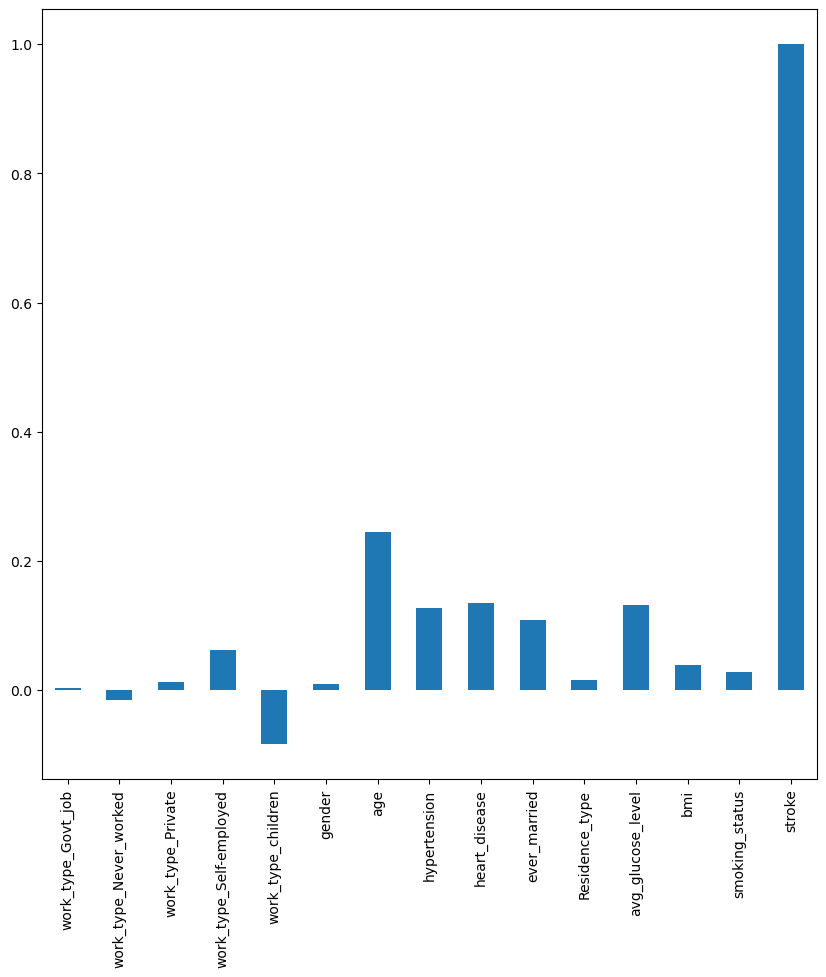

In [26]:
#plotting the correlation between target variable and other columns
cor_relation=dataframe.corrwith(dataframe["stroke"])
cor_relation.plot(kind='bar')
matplt.show()

## Model Train

In [27]:
depent_axis = dataframe["stroke"]
independent_axis = dataframe.drop(["stroke"],axis=1)

### Data Scaling

In [28]:
#Data Scaling
scaler = StandardScaler()
independent_axis = scaler.fit_transform(independent_axis)
independent_axis

array([[-3.84110640e-01, -6.57563637e-02,  8.64296562e-01, ...,
         2.70637544e+00,  1.00123401e+00, -3.51780710e-01],
       [-3.84110640e-01, -6.57563637e-02, -1.15701027e+00, ...,
         2.12155854e+00, -6.00021962e-15,  5.81552327e-01],
       [-3.84110640e-01, -6.57563637e-02,  8.64296562e-01, ...,
        -5.02830130e-03,  4.68577254e-01,  5.81552327e-01],
       ...,
       [-3.84110640e-01, -6.57563637e-02, -1.15701027e+00, ...,
        -5.11442636e-01,  2.21736316e-01,  5.81552327e-01],
       [-3.84110640e-01, -6.57563637e-02,  8.64296562e-01, ...,
         1.32825706e+00, -4.27845098e-01, -3.51780710e-01],
       [ 2.60341656e+00, -6.57563637e-02, -1.15701027e+00, ...,
        -4.60867458e-01, -3.49895329e-01, -1.28511375e+00]])

### Dataframe Split into training and test sets

In [29]:
#Data Splitting
x_train,x_test,y_train,y_test = train_test_split(independent_axis,depent_axis,test_size=0.2,random_state=42)

In [30]:
#Preproces the dataframe to print name of the model models and their respecrive model accuracy
model_accuracy = pds.DataFrame(columns=['Name of the Model','Model Accuracy'])

## Before Oversampling

### Random Forest

In [31]:
#Creating a model using Random Forest Classifier
random_model = RandomForestClassifier()
#Training the model using training data
random_model.fit(x_train, y_train)

y_pred = random_model.predict(x_test)

# Testing the model using the testing data
accuracy = random_model.score(x_test, y_test)

print('Presentage of Random Forest Classifier scores')
print(f'Random Forest Classifier Model accuracy\t: {accuracy}')
print(f'Presentage\t: {"{:.1%}".format(accuracy)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Name of the Model': 'Random Forest Classification', 'Model Accuracy': accuracy}, ignore_index=True)
# Getting the confusion matrix
print('Confusion Matrix - ')
print(confusion_matrix(y_test, y_pred))

Presentage of Random Forest Classifier scores
Random Forest Classifier Model accuracy	: 0.9393346379647749
Presentage	: 93.9%
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix - 
[[960   0]
 [ 62   0]]


In [32]:
#Print the model and respective accuracy
print("Model and it's respective accuracy before oversampling - ")
print(model_accuracy)

Model and it's respective accuracy before oversampling - 
              Name of the Model  Model Accuracy
0  Random Forest Classification        0.939335


### Consider data inbalance

<AxesSubplot:xlabel='stroke', ylabel='count'>

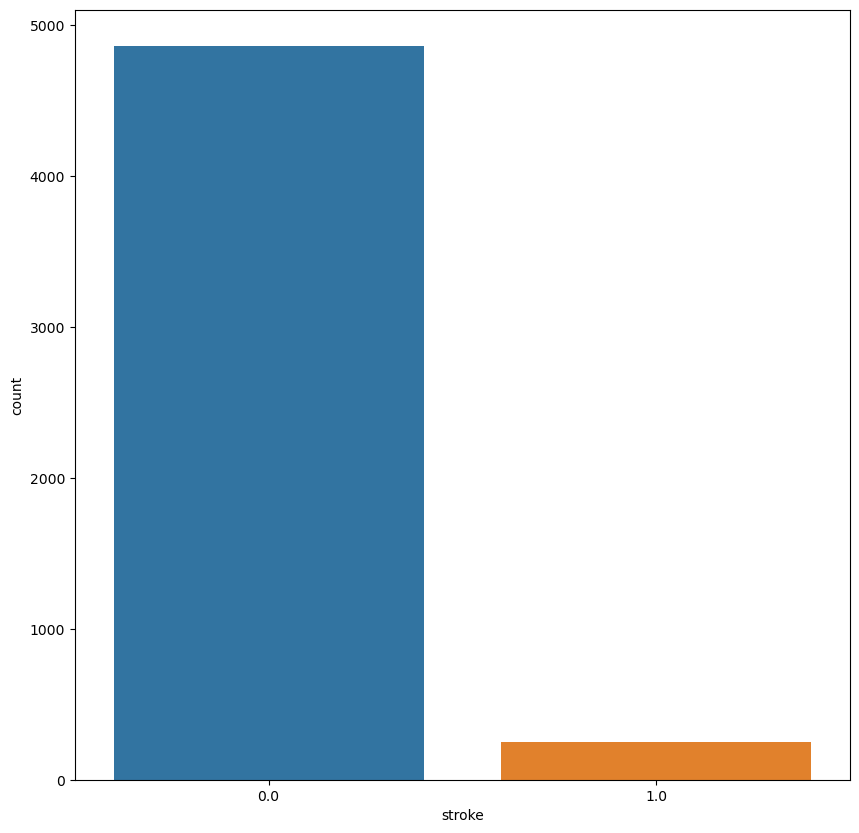

In [33]:
sns.countplot(x='stroke',data=dataframe)

In [34]:
#Count number of people who has experienced a stroke or not
dataframe['stroke'].value_counts()

print("Presentage of people stroking = ")
len(dataframe[dataframe['stroke'] == 1])/len(dataframe)*100

Presentage of people stroking = 


4.87279843444227

### Apply oversampling method for the dataframe

<AxesSubplot:xlabel='stroke', ylabel='count'>

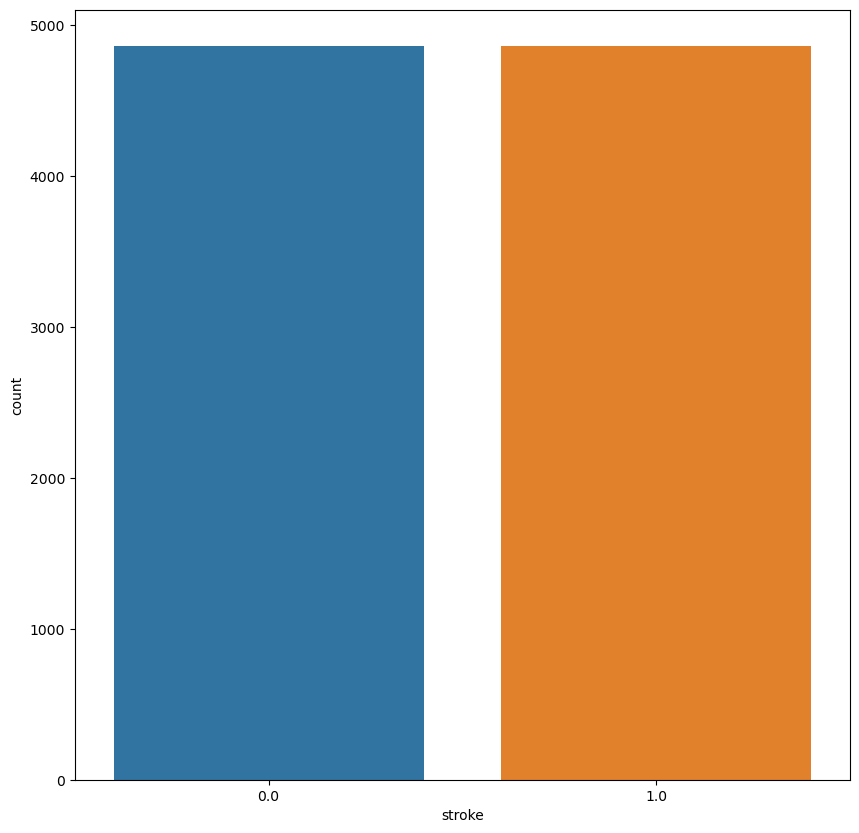

In [35]:
# For the data imbalance apply oversamping techniques
independent_axis, depent_axis = SMOTE().fit_resample(independent_axis, depent_axis)

#Viewing plot
sns.countplot(x=depent_axis, data=dataframe)

In [36]:
#Again data allocate the as train and test data
x_train,x_test,y_train,y_test = train_test_split(independent_axis,depent_axis,test_size=0.2,random_state=42)

In [37]:
#Creating a model using Random Forest Classifier
random_model = RandomForestClassifier()
#Training the model using training data
random_model.fit(x_train, y_train)

y_pred = random_model.predict(x_test)

# Testing the model using the testing data
accuracy = random_model.score(x_test, y_test)

print('Presentage of Random Forest Classifier scores')
print(f'Random Forest Classifier Model accuracy\t: {accuracy}')
print(f'Presentage\t: {"{:.1%}".format(accuracy)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Name of the Model': 'Random Forest Classification', 'Model Accuracy': accuracy}, ignore_index=True)
# Getting the confusion matrix
print('Confusion Matrix - ')
print(confusion_matrix(y_test, y_pred))

Presentage of Random Forest Classifier scores
Random Forest Classifier Model accuracy	: 0.9568123393316196
Presentage	: 95.7%
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       975
         1.0       0.95      0.97      0.96       970

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945

Confusion Matrix - 
[[921  54]
 [ 30 940]]


In [38]:
# Create a model using Support vector machine classifier
model = SVC()

In [39]:
# Train the model using the training set
model.fit(x_train, y_train)

SVC()

In [40]:
y_pred = model.predict(x_test)

In [41]:
# Testing the model using the testing data
accuracy = model.score(x_test, y_test)

y_pred = model.predict(x_test)

In [42]:
print('Presentage of Support vector Classifier scores')
print(f' Support vector Classifier Model accuracy\t: {accuracy}')
print(f'Presentage\t: {"{:.1%}".format(accuracy)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Name of the Model': 'Support vector machine Classification', 'Model Accuracy': accuracy}, ignore_index=True)

Presentage of Support vector Classifier scores
 Support vector Classifier Model accuracy	: 0.8508997429305912
Presentage	: 85.1%
              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84       975
         1.0       0.80      0.93      0.86       970

    accuracy                           0.85      1945
   macro avg       0.86      0.85      0.85      1945
weighted avg       0.86      0.85      0.85      1945

